In [1]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# Load preprocessed data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

In [3]:
# ============================================
# MODEL 1: Random Forest (Baseline)
# ============================================
print("Training Random Forest...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Handle imbalanced data
)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("\n=== Random Forest Results ===")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")



Training Random Forest...

=== Random Forest Results ===
Accuracy: 0.7751
Precision: 0.5631
Recall: 0.6720
F1-Score: 0.6127
ROC-AUC: 0.8362


In [4]:
# ============================================
# MODEL 2: XGBoost (Better Performance)
# ============================================
print("\nTraining XGBoost...")

# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("\n=== XGBoost Results ===")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, xgb_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")




Training XGBoost...

=== XGBoost Results ===
Accuracy: 0.7537
Precision: 0.5260
Recall: 0.7070
F1-Score: 0.6032
ROC-AUC: 0.8301


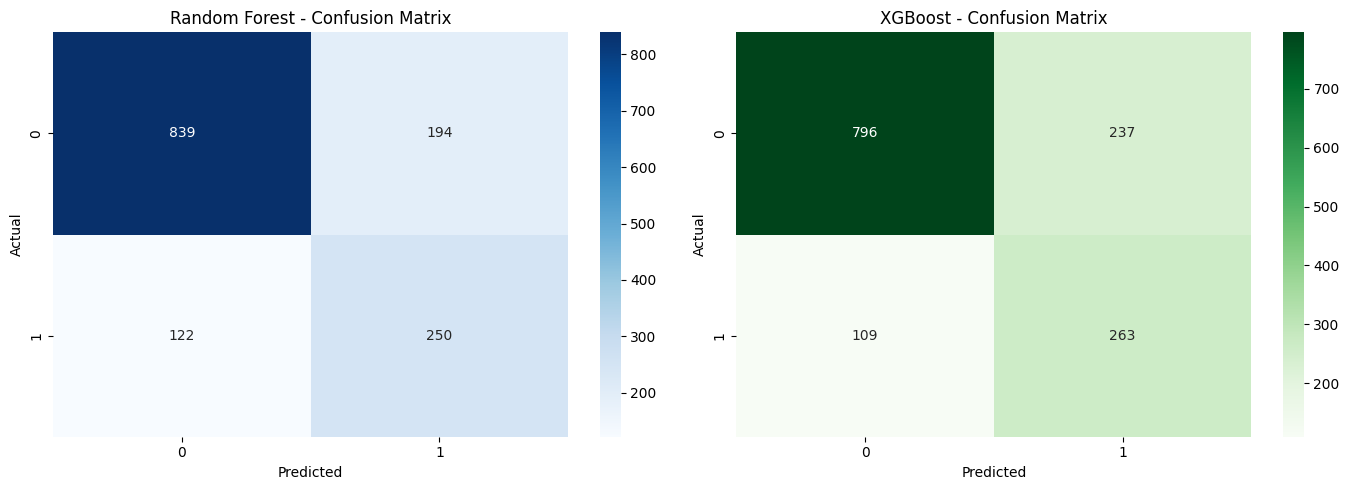

In [5]:
# ============================================
# VISUALIZATION
# ============================================

# 1. Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest - Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# XGBoost
cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost - Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('../images/confusion_matrices.png', dpi=300, bbox_inches='tight')



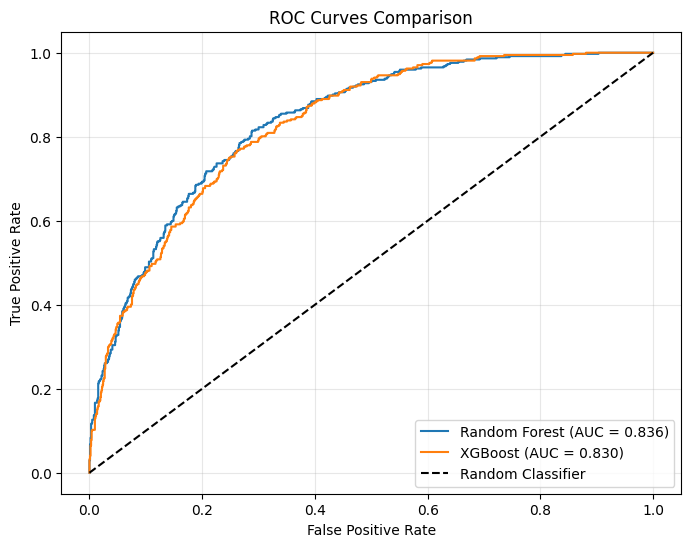

In [6]:
# 2. ROC Curves
plt.figure(figsize=(8, 6))

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, rf_pred_proba):.3f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, xgb_pred_proba):.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../images/roc_curves.png', dpi=300, bbox_inches='tight')



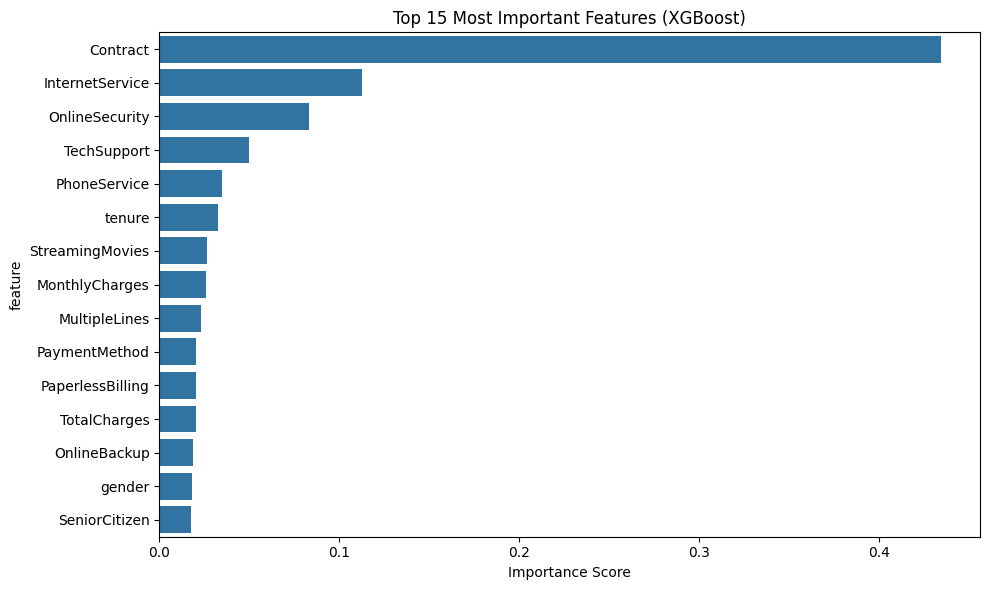

In [7]:
# 3. Feature Importance (XGBoost)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('../images/feature_importance.png', dpi=300, bbox_inches='tight')



In [9]:
# ============================================
# SAVE BEST MODEL (XGBoost)
# ============================================
joblib.dump(xgb_model, '../models/xgb_churn_model.pkl')
print("\n✅ Model saved to models/xgb_churn_model.pkl")




✅ Model saved to models/xgb_churn_model.pkl


In [10]:
# Save feature names for later use
joblib.dump(X_train.columns.tolist(), '../models/feature_names.pkl')

['../models/feature_names.pkl']